In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/files/programming/Python/2025/jupyter/datasets/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
print('Total people:',df['Survived'].size)
print(df['Survived'].value_counts())
print("Percentage:")
df['Survived'].value_counts(normalize=True)*100

Total people: 891
Survived
0    549
1    342
Name: count, dtype: int64
Percentage:


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived'>

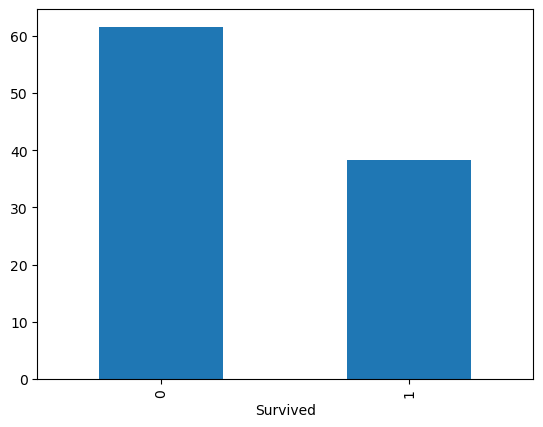

In [25]:
df['Survived'].value_counts(normalize=True).multiply(100).plot(kind='bar')

## id

In [27]:
# check if all unique

In [31]:
if len(df['PassengerId'].unique())==df['Survived'].size:
    print("All values are unique")

All values are unique


## Pclass

In [33]:
print( "Unique values in Plass:",df['Pclass'].unique())

Unique values in Plass: [3 1 2]


In [34]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Sex

In [36]:
df['Sex'].value_counts(normalize=True)*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

### Age - null values

In [51]:
df['Age'].value_counts().sum()

np.int64(714)

In [52]:
df['Age'].isnull().sum()

np.int64(177)

In [58]:
print("% of null values in Age column are: ")
(df['Age'].isnull().sum()/df['Survived'].size)*100

% of null values in Age column are: 


np.float64(19.865319865319865)

In [59]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Outliers

In [61]:
# IQR = Q3 - Q1
# Lower limit = Q1 - 1.5 × IQR
# Upper limit = Q3 + 1.5 × IQR

<Axes: xlabel='Age'>

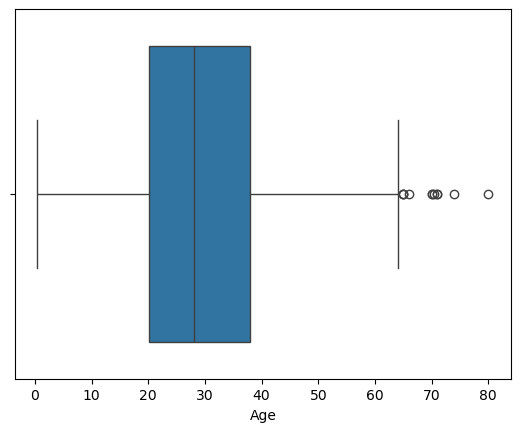

In [63]:
sns.boxplot(x=df['Age'])

In [68]:
# mathematically finding outliers:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)

IQR=Q3-Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

In [76]:
print("All outliers :")
df[(df['Age']<lower) | (df['Age'] >upper )]

All outliers :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
